In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [13]:
X = dataset.drop(['day','month','year','FWI'],axis=1)
y= dataset['FWI']

In [24]:
X['Classes'] = np.where(X['Classes'].str.contains('not fire'),0,1)

In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [27]:
##Train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((162, 11), (81, 11), (162,), (81,))

In [29]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [38]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr   

In [36]:
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


In [40]:
##Threshold domain expertise
corr_features = correlation(X,0.85)

In [41]:
corr_features

{'BUI', 'DC'}

In [42]:
X.drop(corr_features,axis=1,inplace=True)

In [43]:
X.shape

(243, 9)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_137/1252470736.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

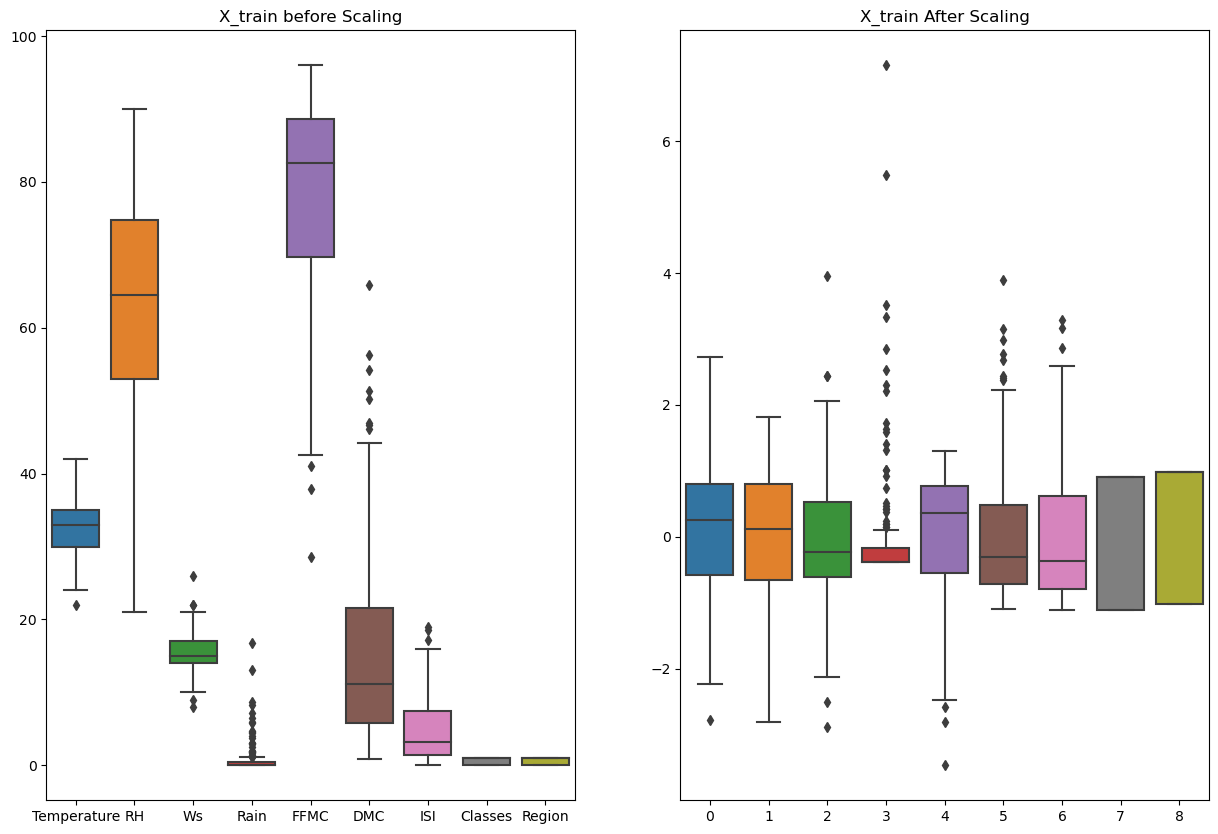

In [47]:
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train After Scaling")

In [53]:
##Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred_test = regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_test)
score = r2_score(y_test,y_pred_test)
print("Mean Absolute Error :",mae)
print("Accuracy :",score)

Mean Absolute Error : 0.5767877823415978
Accuracy : 0.9845563190792226


In [54]:
##Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_test = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_test)
score = r2_score(y_test,y_pred_test)
print("Mean Absolute Error :",mae)
print("Accuracy :",score)

Mean Absolute Error : 1.1053469612945104
Accuracy : 0.9514102148198663


In [55]:
##Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_test = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_test)
score = r2_score(y_test,y_pred_test)
print("Mean Absolute Error :",mae)
print("Accuracy :",score)

Mean Absolute Error : 0.5953582907340912
Accuracy : 0.9839564989246832


In [56]:
##Elasticnet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred_test = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_test)
score = r2_score(y_test,y_pred_test)
print("Mean Absolute Error :",mae)
print("Accuracy :",score)

Mean Absolute Error : 1.834545337587552
Accuracy : 0.8825431896054333


In [57]:
import pickle 
pickle.dump(scaler,open('scaler_1.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))